

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## PGE 383 Graduate Student Project Template 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### General Guidance

I'm expecting an **educational product** that could be handed to a student and they could quickly learn a new concept. Ask yourself, could someone new to machine learning understand my workflow?

* this is a win-win since it is  an opportunity to you to dive deeper and explore a concepted related to a machine learning algorithm and is good practice for communicating machine learning with others (something that you will have to do at work)

#### Expectations for Your Well-documented Workflow

* **flow** include a consistent narrative, e.g., no 2 code blocks should be adjacent, always have a short statement to explain, connect to the next code block

* **concise** be as concise as possible:

    * use point form (except for the executive summary) 
    * use effective, creative figures that combine what could have been in multiple plots onto a single plot when possible
    * every line of code, statment or figure must have purpose
    * conciseness is part of the grading, don't add content that isn't needed
    * aim for 4-5 pages of Jupyter notebook
    
* be very clear

    * great executive summary
    * label every axis
    * use readable code, logical variable names, use available functionality for compactness
  
#### Using Code From Others
  
You may use blocks/snipets of code from other sources with citation. To cite a set of code separate in a block and do this in the markdown above the block.

The following code block is from Professor Michael Pyrcz (@GeostatsGuy), SubSurfuceDataAnalytics_PCA.ipynb from [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb).

```python
def simple_simple_krige(df,xcol,ycol,vcol,dfl,xlcol,ylcol,vario,skmean):
# load the variogram
    nst = vario['nst']; pmx = 9999.9
    cc = np.zeros(nst); aa = np.zeros(nst); it = np.zeros(nst)
```

or use inline citations such as this for a few of lines of code.

```python
def simple_simple_krige(df,xcol,ycol,vcol,dfl,xlcol,ylcol,vario,skmean): # function from Professor Michael Pyrcz,https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_PCA.ipynb 
```

#### The Workflow Template

Here's the template for your workflow.

____________________



## Model Bias

#### Byungtark Lee (bl25969)
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Misael Morales, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/misaelmmorales/)


### Executive Summary
* Machine learning models are designed to predict desired feature references. Therefore, if we can do a better estimation with less dataset, it could be a great tool for model developments. We want (are asked) to evaluate model bias with imputation using gradient boosted decision tree model. 

* To evaluate model bias, we sequentially remove a percentage of data from the dataset and develop models. Using the models, we impute the missing (intentionally removed) data. We do this process for gradient boosted decision tree model to evaluate the sensitivity of model bias.

* Through this study, we can learn how different percentage of missing data can create bias with model complexity. Based on conditions given in thie project, we can expect and learn which condition could be better for modeling development. 

* Consequently, we can get an idea whether we trust the data or not if the missing dataset is more than certain threshold with gradient boosted decision tree model. Later, we can use other machine learning models for comparison and this study will help to decide a proper model with given project. 

### Import Packages

In [1]:
!pip install geostatspy  # Function from Professor Michael Pyrcz,https://github.com/GeostatsGuy
!pip install catboost    # To run for gradient boosted decision tree, https://catboost.ai/en/docs/concepts/python-quickstart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 723 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [2]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python  
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
import copy                               # for deep copies
import seaborn as sns                     # for plotting

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
# Import function for replicability
import random

### Load Data

I used "unconv_MV_v5.csv" from https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v5.csv')

### Functions

The following functions will be used in the workflow.

In [4]:
# Function to remove data randomly. P is the percentage of the data to remove
def remove_dataset_portion(X,Y,p):
  return train_test_split(X,Y, train_size=1-p, random_state=42)

In [5]:
# Build a machine learning model for gradient boosted decision tree 
def build_model(mc,rp):
  #mc is model complexity
  #rp is remove portion
  Y = dataset['Prod'].values
  X = dataset[['Por', 'Perm', 'Brittle', 'TOC']].values

  scaler = MinMaxScaler()
  scaler.fit(X)
  Xs = scaler.transform(X)
  Ys = (Y - Y.min())/ (Y.max()-Y.min())
  # First we remove a percentage of the dataset. That is Y_removed and X_removed. Next we use X_removed to impute Y_removed 
  # from the dataset.
  X_train_test, X_removed, Y_train_test, Y_removed  = remove_dataset_portion(Xs, Ys, rp)
  # Once we removed a percentage of the dataset, we perform train/test split to train a model with missing data
  X_train, X_test, Y_train, Y_test = train_test_split(X_train_test, Y_train_test, test_size=0.3, random_state=42)

  # Construct the model
  # Example code from Catboost (2019). 
  # Catboost: CatboostRegressor https://catboost.ai/en/docs/concepts/python-quickstart
  model = CatBoostRegressor(iterations= mc,
                          learning_rate=0.01,
                          loss_function='RMSE',
                          verbose=False, random_seed=0)
  # Fit the model
  model.fit(X_train, Y_train)
  # Predict on testing data and then
  Y_predicted = model.predict(X_test)
  # Impute the missing data
  Y_removed_predicted = model.predict(X_removed)
  # Return the Y_predicted (from testing), Y_test (the true test value), Y_removed_predicted (The imputed data), Y_removed (Removed response feature)
  return Y_predicted, Y_test, Y_removed_predicted, Y_removed

### Workflow

1. Define and check the dataset
2. Randomly delete the data
3. Gradient boosted decision tree

  3.1. Initial estimate model bias using gradient boosted decision tree (Used only for initial model check)

  3.2. Model bias versus complexity

  3.3. Plots to check the model bias

4. Results


### 1. Define and check the dataset

Designate the data in X and Y

In [6]:
X = dataset[['TOC','VR','Brittle','AI','Perm','Por']]
Y = dataset['Prod']

### 2. Ramdomly delete the data

Randomly delete the data 10%, 50%, 90% from the original dataset (predictor feature: brittlenes, response feature: production). Check whether the function works correctly or not.

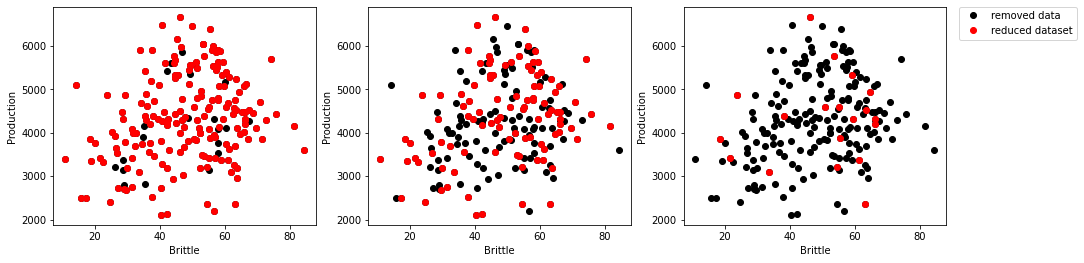

In [7]:
fig,axs = plt.subplots(1,3,figsize=(16,4))
ax=axs[0]
X_remaining, _, Y_remaining, _ = remove_dataset_portion(X, Y, 0.1) # Removing 10% of the dataset
ax.plot(X['Brittle'],Y,'ko',label='removed data');
ax.plot(X_remaining['Brittle'],Y_remaining,'ro',label='reduced dataset');
ax.set_ylabel('Production')
ax.set_xlabel('Brittle')

ax=axs[1]
X_remaining, _, Y_remaining, _ = remove_dataset_portion(X, Y, 0.5) # Removing 50% of the dataset
ax.plot(X['Brittle'],Y,'ko',label='removed data');
ax.plot(X_remaining['Brittle'],Y_remaining,'ro',label='reduced dataset');
ax.set_ylabel('Production')
ax.set_xlabel('Brittle')

ax=axs[2]
X_remaining, _, Y_remaining, _ = remove_dataset_portion(X, Y, 0.9) # Removing 90% of the dataset
ax.plot(X['Brittle'],Y,'ko',label='removed data');
ax.plot(X_remaining['Brittle'],Y_remaining,'ro',label='reduced dataset');
ax.set_ylabel('Production')
ax.set_xlabel('Brittle')

ax.legend(loc = (1.05,0.85))

Figure 1. Brittle vs. Production. These figures (10, 50, 90% data removal from left) show the randomly deleted data (black dots) from the original data set. The deleted data will be used as test datasets. This is a test process for later applications with 10 - 90% random removal.

### 3. Gradient boosted decision tree

Due to the space limitation, I summarized the gradient boosting decision tree method from "SubsurfaceDataAnalytics_Gradient_Boosting.ipynb" from Dr. Pyrcz class note. Sequentially, boosting method, gradient boosting and tree construction are introduced.

#### Boosting Methods
The general workflow for predicting $Y$ from $X_1,\ldots,X_m$ is:

* build a week learner to predict $Y$ from $X_1,\ldots,X_m$, $\hat{F}_k(X)$ from the training data $x_{i,j}$.

* loop over number of desired estimators, $k = 1,\ldots,K$

We have a hiearchy of simple $K$ models. 

* each model builds on the previous to improve the accuracy

Our regression estimator is the summation over the $K$ simple models.

\begin{equation}
\hat{Y} =\sum_{k=1}^{K} F_k(X_1,\ldots,X_m)
\end{equation}

#### Gradient Boosting Methods
Of the general form:

\begin{equation}
\phi_{k+1} = \phi_k - \rho \frac{\partial J}{\partial \phi_k}
\end{equation}

where $phi_k$ is the current state, $\rho$ is the learning rate, $J$ is the loss function, and $\phi_{k+1}$ is the next state of our estimator.

If we consider our residual at training data to be a gradient then we are performing gradient descent.  

* fitting a series of models to negative gradients

By approaching the problem as a gradient decent problem we are able to apply a variety of loss functions

* $\ell2$ is our $\frac{\left(y - F(X)\right)^2}{2}$ is practical, but is not robust with outliers

\begin{equation}
- 1 \frac{\partial J}{\partial F_k(X_i)} = y_i - F_k(X_i)
\end{equation}

* $\ell1$ is our $|y - F(X)|$ is more robust with outliers

\begin{equation}
- 1 \frac{\partial J}{\partial F_k(X_i)} = sign(y_i - F_k(X_i))
\end{equation}

#### Tree-based Boosting Methods

Machine learning method for supervised learning for classification and regression analysis. Here are some key aspects of random forest.

**Prediction**

* estimate a function $\hat{f}$ such that we predict a response feature $Y$ from a set of predictor features $X_1,\ldots,X_m$. 

* the prediction is of the form $\hat{Y} = \hat{f}(X_1,\ldots,X_m)$ 

**Supervised Learning**

* the response feature label, $Y$, is available over the training and testing data
    
**Hiearchical, Binary Segmentation of the Feature Space**

The fundamental idea is to divide the predictor space, $𝑋_1,\ldots,X_m$, into $J$ mutually exclusive, exhaustive regions

* **mutually exclusive** 

* **exhaustive** 
 
**Proceedure for Tree Construction**

The tree is constructed from the top down.  We begin with a sigle region that covers the entire feature space and then proceed with a sequence of splits.

* **Scan All Possible Splits** over all regions and over all features.

* **Greedy Optimization**  The method proceeds by finding the first segmentation (split) in any feature that minimizes the residual sum of squares of errors over all the training data $y_i$ over all of the regions $j = 1,\ldots,J$.

\begin{equation}
RSS = \sum^{J}_{j=1} \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2
\end{equation}

#### 3.1. Initial estimate model bias using gradient boosted decision tree
Through this procedure, simply check whether the model runs correctly or not. All cases will be run in later section 3.2. The gradient boosted decision tree model runs correctly.

In [8]:
Y = dataset['Prod'].values
X = dataset[['Por', 'Perm', 'Brittle', 'TOC']].values

scaler = MinMaxScaler() #Normalized the data
scaler.fit(X)
Xs = scaler.transform(X)
Ys = (Y - Y.min())/ (Y.max()-Y.min())

X_train_test, X_removed, Y_train_test, Y_removed  = remove_dataset_portion(Xs, Ys, 0.1) # Remove portion
X_train, X_test, Y_train, Y_test = train_test_split(X_train_test, Y_train_test, test_size=0.1)

# GBDT model
model = CatBoostRegressor(iterations= 1000,
                          learning_rate=0.01,
                          loss_function='RMSE',
                          verbose=False, random_seed=0)

model.fit(X_train, Y_train)
Y_predicted = model.predict(X_test)

(0.0, 1.0)

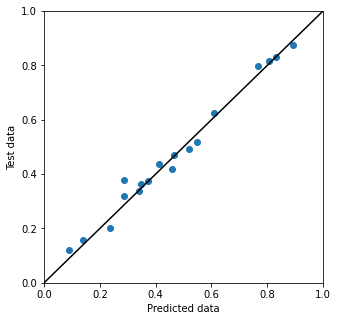

In [9]:
# Compare the observed data and predicted data
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(Y_test,Y_predicted,'o')
ax.set_ylabel('Test data')
ax.set_xlabel('Predicted data')
ax.plot([-1.5,1.5], [-1.5,1.5], 'black')
ax.set_ylim(0,1)
ax.set_xlim(0,1)

Figure 2. Predicted data va. Test data (10% of training data). 10% data are deleted and the deleted data were imputed with the gradient boosted model. This is a test process and the model runs well. 

#### 3.2. Model bias versus complexity

Repeat same case running but without plots, using a grid approach. Previouly, the model was validated with loop and checked with visualization. Let's run for 19 x 21 cases. 

In [10]:
# Redefine the model complexity and remove portion.
mc_list = np.arange(100,1050,50)
rp_list = np.linspace(0.1,0.9,21)

In [11]:
mc_list,rp_list

(array([ 100,  150,  200,  250,  300,  350,  400,  450,  500,  550,  600,
         650,  700,  750,  800,  850,  900,  950, 1000]),
 array([0.1 , 0.14, 0.18, 0.22, 0.26, 0.3 , 0.34, 0.38, 0.42, 0.46, 0.5 ,
        0.54, 0.58, 0.62, 0.66, 0.7 , 0.74, 0.78, 0.82, 0.86, 0.9 ]))

In [12]:
# fine the mean values to compare and find the best result.
mean_list = np.zeros([mc_list.shape[0],rp_list.shape[0]])
# for every model complexity
for i in range(mc_list.shape[0]):
  # for every percentage of data removed
  for j in range(rp_list.shape[0]):
    # predict for Y_test (test) and predict for Y_removed (imputed)
    Y_predicted, Y_test, Y_removed_predicted, Y_removed = build_model(mc_list[i],rp_list[j])
    # evaluate mean error
    mean = np.mean(Y_removed-Y_removed_predicted.mean())
    mean_list[i,j] = mean

#### 3.3. Plots to check the model bias

Check the mean error to find the model bias.

Plot.1 - Plot of mean error vs. mean error versus fraction of removed data at multiple model complexities.

Plot.2 - Plot of model complexity vs. (fraction of removed data vs. mean error).

Plot.3 - Plot of model complexity vs. mean error.


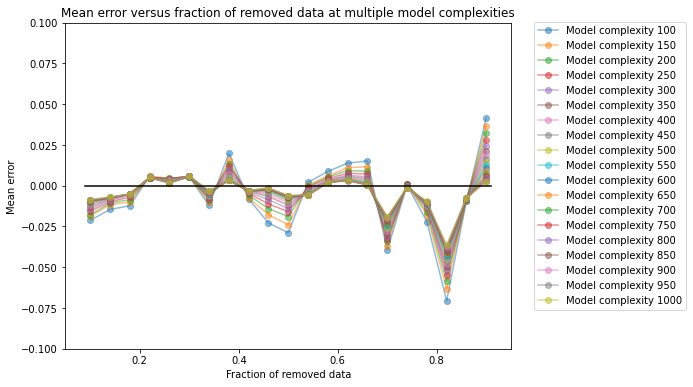

In [13]:
# Plot mean erorr for all cases
fig, ax = plt.subplots(figsize=(8,6))

for i in range(mc_list.shape[0]):
  ax.plot(rp_list,mean_list[i,:],'-o',label=f'Model complexity {mc_list[i]}',alpha=0.5)
ax.plot([0.09,0.91],[0,0],'-k')
ax.set_ylim(-0.1,0.1)
ax.set_ylabel('Mean error')
ax.set_xlabel('Fraction of removed data')
ax.set_title(f'Mean error versus fraction of removed data at multiple model complexities')

ax.legend(loc = (1.05,0.12))

Figure 3. This figure shows the fraction of removed data vs. mean error with different complexities. When the percentage of the removed data increases, the mean error values are slightly increased and especially more than 40% initial train data removal, the mean error variance increases significanly. Also there is a pattern that most of fraction of removed data, the models with complexity = 100 in each removal percentage cases have the highest mean error as expected (when fraction of removal values are equal or higher than 0.38).  

Text(0, 0.5, 'Mean error')

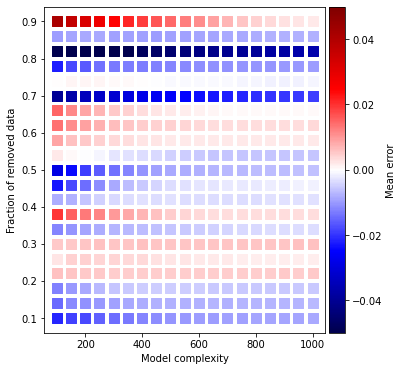

In [14]:
# Plot of model complexity vs. (fraction of removed data vs. mean error)
fig, ax = plt.subplots(figsize=(6,6))

X_grid, Y_grid = np.meshgrid(mc_list,rp_list)
im = ax.scatter(X_grid.flatten(),Y_grid.flatten(),c = mean_list.T.flatten(),cmap='seismic',marker='s',s=100, vmin=-0.05, vmax=0.05) #,label=f'Model complexity {mc_list[i]}',alpha=0.5)
cb = fig.colorbar(im, pad = 0.01)
ax.set_ylabel('Fraction of removed data')
ax.set_xlabel('Model complexity')
cb.ax.set_ylabel('Mean error')

Figure 4. This figure shows the model complexity vs. fraction of removed data with mean error. Based on the above graph, when complexity is larger, the mean error variance is decreased (colors are faded). Also, according to the increase of missing data, the mean errors variance are high and shifted to negative side little bit (dark blue and dark red colors in upper side of the graph with more dark blue grids). With lower percentages of removal data, the red and blue colors are regularly distributed. It means that the model is biased! The most faded region is lower right corner when model complexity is high and the data removal is small. 

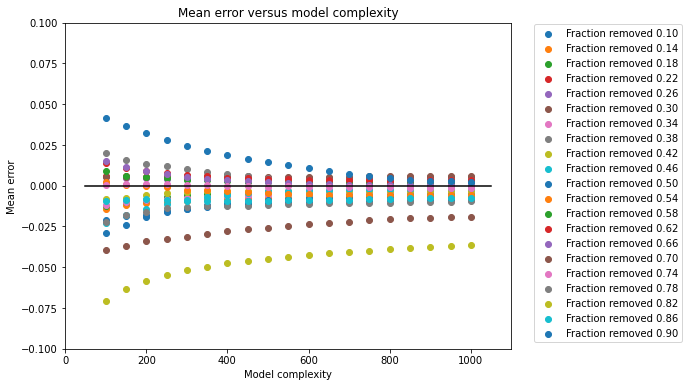

In [15]:
# Plot of model complexity vs (mean errro & fraction of data removed)
fig, ax = plt.subplots(figsize=(8,6))

for i in range(rp_list.shape[0]):
  im = ax.scatter(mc_list,mean_list[:,i],cmap='viridis',label=f'Fraction removed {rp_list[i]:2.2f}',alpha=1, vmin=-0.06, vmax=0.06)#, c='b')
ax.plot([50,1050],[0,0],'-k')
ax.set_ylim(-0.1,0.1)
ax.set_ylabel('Mean error')
ax.set_xlabel('Model complexity')
ax.set_title(f'Mean error versus model complexity')
ax.legend(loc = (1.05,0.02))

Figure 5. This figure shows the model complexity vs. mean error with fraction of removed data. It is clear that larger complexity reduce the mean error variance. The centers of the mean error variances are slightly lower than zero. It means that the model has a tendency of overestimation. When the removel data is less, the mean error values are closed to zero as expected. When the percentage of the removed data are 70%, 84%, 90%, the mean error variances are much larger than other cases.

In [16]:
# Let's make a table to see overall trend and pick the best case
mc_grid, rp_grid = np.meshgrid(mc_list,rp_list)

table = np.zeros([mc_grid.flatten().shape[0],3])
table[:,0] = mc_grid.flatten()
table[:,1] = rp_grid.flatten()
table[:,2] = mean_list.T.flatten()

data_table = pd.DataFrame(table, columns = ['Model_complexity','Percentage_removed','Mean Error'])
# Because of the space, I commented the table. 
data_table.head(5)

,Model_complexity,Percentage_removed,Mean Error
0,100.0,0.1,-0.021202
1,150.0,0.1,-0.018709
2,200.0,0.1,-0.017668
3,250.0,0.1,-0.015599
4,300.0,0.1,-0.014231


Table 1. This table shows the mean error values for all cases from gradient boosted decision tree model with complexity (100 - 1000) and data removal percentage (10 - 90%).

In [17]:
print(data_table.loc[data_table['Mean Error'].abs()==data_table['Mean Error'].abs().min()])

     Model_complexity  Percentage_removed  Mean Error
310             400.0                0.74     0.00009


The best results (the lowest mean error) comes with the model complexity with 200 and 36% data removal. 

### Results

In this project, we test the model bias with gradient boosted decision tree model. The model has a powerful prediction algorithms to estimate missing values. 

From 10 to 90% of data are removed and models are constructed the rest of the data with complexity between 100 and 1000. Total 19 x 21 (399) cases are conducted.

Based on the modeling results, we can find the expected phenomena. This is a summary of the results.

* Gradient boosted decision tree model does well predictions with the data removal percentages between 10 and 40% (Figure3 ). When the missing values are more than 40%, the model created high mean error variance as expected. 

* Mean error variance until 40% data removal ranges from - 0.25 to 0.25 however with more than 40% data removals, those variance range -0.75 - 0.5.

* The best case with gradient boosted decision tree model comes from complexity 400 and 74% missing dat with mean error = 0.00009 (Table 1). 

The gradient boosted decision tree model can estimate the missing values very well. While the gradient boosted decision tree model has narrower mean error variance with a tendency of overestimation until 40% data removal, it showed high variance mean error after that. Therefore, based on this study, when the missing data is getting larger, we need to be careful to apply the machine learning model directly (no free lunch). 

(All plots and table are introduced in the middle of the notebook.)


___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
